# Circles dataset

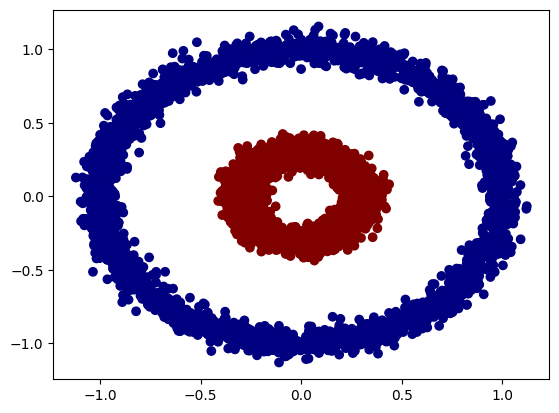

In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.datasets import make_circles
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from tdamapper.core import MapperAlgorithm
from tdamapper.cover import CubicalCover
from tdamapper.plot import MapperPlot

X, y = make_circles(                # load a labelled dataset
    n_samples=5000,
    noise=0.05,
    factor=0.3,
    random_state=42
)
lens = PCA(2, random_state=42).fit_transform(X)

plt.scatter(lens[:, 0], lens[:, 1], c=y, cmap='jet')

### Build Mapper graph

In [2]:
mapper_algo = MapperAlgorithm(
    cover=CubicalCover(
        n_intervals=10,
        overlap_frac=0.3
    ),
    clustering=DBSCAN()
)

mapper_graph = mapper_algo.fit_transform(X, lens)

### Plot Mapper graph with mean

In [3]:
mapper_plot = MapperPlot(
    mapper_graph,
    dim=2,
    iterations=60,
    seed=42
)

fig = mapper_plot.plot_plotly(
    colors=y,                       # color according to categorical values
    cmap='jet',                     # Jet colormap, for classes
    agg=np.nanmean,                 # aggregate on nodes according to mean
    width=600,
    height=600
)

fig.show(
    renderer='notebook_connected',
    config={'scrollZoom': True}
)

In [4]:
mapper_plot.plot_plotly_update(
    fig,                            # update the old figure
    colors=y,
    cmap='viridis',                 # viridis colormap, for ranges
    agg=np.nanstd                   # aggregate on nodes according to std
)                  
    
fig.show(
    renderer='notebook_connected',
    config={'scrollZoom': True}
)